In [2]:
from __future__ import division
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
import math
from sklearn import svm
from sklearn.svm import SVC
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
Read = pd.read_csv('db_gun.csv',header=None)

Dataset = Read[1:]
Data = Dataset.values
db=Data[:136,0:]
X_Data = Data[:136,2:]
X_Data.astype('int')
y_Data = Data[:136,0]
y_Data.astype('int')
y1_Data=Data[:136,1]
y1_Data.astype("int")

data=[]
for r in Data:
    row=[]
    for e in r:
        row.append(int(e))
    data.append(row)
data=np.array(data)
#print len(data)

In [4]:
#Y-numpy
y=[]
for r in y_Data:
	row=[]
	row.append(int(r))
	y.append(row)
y=np.array(y)

#y1-numpy
y1=[]
for r in y1_Data:
	row=[]
	row.append(int(r))
	y1.append(row)
y1=np.array(y)

#X- numpy
X=[]
for r in X_Data:
	row=[]
	for e in r:
		row.append(int(e))
	X.append(row)
X=np.array(X)

In [5]:
'''
For label1 - Severity
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
'''
For label2 - Type
'''
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, train_size=0.9)

In [12]:
'''
K-Fold
'''
clf=SVC()
kf = KFold(len(data), n_folds=10)
#len(Data), n_folds=10
results = []
res_1=[]
res_2=[]
acc = []
acc2=[]
y1_list = []
y2_list = []
tot = 0
it = 0
tot1=0

for traincv, testcv in kf:
    it += 1
    train = data[traincv]
    test = data[testcv]    
    train_y = train[:136,0]
    test_y = test[:136,0]
    train_y1 = train[:136,1]
    test_y1 = test[:136,1]
    train_x = train[:136,2:]
    test_x = test[:136,2:]
    #clf = svm.SVC(kernel='linear', C = 1.0)

    #SVM
    clf=SVC()
    c1=clf.fit(train_x,train_y)
    result1=c1.predict(test_x)
    c2=clf.fit(train_x,train_y1)
    result2=c2.predict(test_x)

    #print result1
    #print y_test
    #print confusion_matrix(y_test, result1,[1,2,3])

    #Confusion Matrix
    c = confusion_matrix(test_y, result1,[1,2,3])

    tot = (c[0][0] + c[1][1] + c[2][2]+c[2][0]+c[0][2])/(np.sum(c)-1.2)
    
    if tot>1:
        y1_list.append(1)
    else:       
        y1_list.append(tot)
        
        
    #acc_1 = tot/14
    acc.append(tot)
    #y1_list.append(tot)
    #print tot*100

    c1 = confusion_matrix(test_y1, result2,[1,2,3])
    tot1 = (c1[0][0] + c1[1][1] + c1[2][2])/(np.sum(c1)-0.6)
    #acc_2 = tot/14
    acc2.append(tot1)
    
    if tot1>1:
        y2_list.append(1)
    else:       
        y2_list.append(tot1)
    #y2_list.append(tot1)
    #print tot1
     
acc=np.array(acc)
print "Accuracy of Severity:", np.mean(acc)*100, "%"
acc2=np.array(acc2)
print "Accuracy of Type    :", np.mean(acc2)*100, "%"

Accuracy of Severity: 80.1906779661 %
Accuracy of Type    : 84.8579682234 %


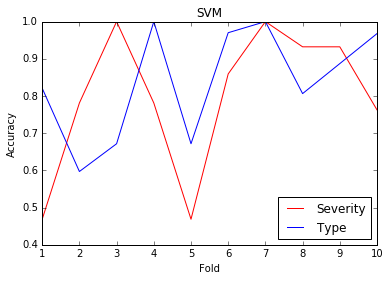

In [13]:
'''
Plotting the graph for accuracy vs. Fold for Severity and Type
'''
x_axis = np.arange(1,11,1)
plt.gca().set_prop_cycle('color',['red', 'blue'])
# acc_th = np.reshape(acc,(-1,9))
plt.plot(x_axis,y1_list)
plt.plot(x_axis,y2_list)
plt.legend(['Severity','Type'], loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('SVM')
plt.show()